## 📊 Project Title: **Analyzing the Impact of Market Sentiment on Trader Performance**

### 🔍 Objective:

To explore whether market sentiment—categorized as **Fear** or **Greed**—has a statistically significant effect on trader performance, measured through **Closed PnL (Profit and Loss)** data, using real-world trading activity from Hyperliquid and historical Bitcoin Fear & Greed Index values.

---

### 📁 Datasets Used:

1. **Bitcoin Market Sentiment Data**

   * Columns: `Date`, `Classification (Fear/Greed)`
   * Represents the market's emotional state on a daily basis.

2. **Hyperliquid Historical Trader Data**

   * Columns include: `Account`, `Coin`, `Execution Price`, `Size`, `Side`, `Timestamp`, `Closed PnL`, etc.
   * Captures detailed trade-level data of various accounts.

---

### 🧠 Key Requirements:

* **Data Cleaning & Preprocessing:** Standardize formats, convert timestamps, handle missing values.
* **Merging Datasets:** Align trades with corresponding sentiment using the `Date` column.
* **Statistical Analysis:**

  * Perform **independent T-test** to compare Closed PnL under "Fear" vs. "Greed" conditions.
  * Identify whether any statistically significant difference exists in trader performance.

---

### 📌 Summary:

This assignment evaluates your ability to:

* Work with multiple datasets
* Handle real-world data quality issues
* Use statistics to draw insights
* Understand behavioral finance dynamics in crypto markets


In [ ]:
#  Imports lib
import pandas as pd


In [65]:
import numpy as np


In [66]:
import matplotlib.pyplot as plt


In [67]:
import seaborn as sns


In [68]:
from datetime import datetime

In [69]:
# 📥 Load Data
fg_df = pd.read_csv(r"C:\Users\Anshu\Downloads\fear_greed_index.csv")
trader_df = pd.read_csv(r"C:\Users\Anshu\Downloads\historical_data.csv")

In [70]:
fg_df

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [71]:
fg_df.columns = fg_df.columns.str.strip().str.lower().str.replace(" ", "_")
trader_df.columns = trader_df.columns.str.strip().str.lower().str.replace(" ", "_")

In [72]:
fg_df.head

<bound method NDFrame.head of        timestamp  value classification        date
0     1517463000     30           Fear  2018-02-01
1     1517549400     15   Extreme Fear  2018-02-02
2     1517635800     40           Fear  2018-02-03
3     1517722200     24   Extreme Fear  2018-02-04
4     1517808600     11   Extreme Fear  2018-02-05
...          ...    ...            ...         ...
2639  1745818200     54        Neutral  2025-04-28
2640  1745904600     60          Greed  2025-04-29
2641  1745991000     56          Greed  2025-04-30
2642  1746077400     53        Neutral  2025-05-01
2643  1746163800     67          Greed  2025-05-02

[2644 rows x 4 columns]>

In [73]:
# 🧹 Preprocess Fear & Greed Data
fg_df['date'] = pd.to_datetime(fg_df['date'])
fg_df['sentiment'] = fg_df['classification'].str.strip().str.lower()

In [74]:
print(trader_df.columns)

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object')


In [87]:
# 🧹 Preprocess Trader Data
fg_df['date'] = pd.to_datetime(trader_df['date'])
fg_df["sentimant"] = fg_df["classification"].str.strip().str.lower()


In [88]:
trader_df["timestamp_ist"] = pd.to_datetime(trader_df["timestamp_ist"], format="%d-%m-%Y %H:%M")
trader_df["date"] = pd.to_datetime(trader_df["timestamp_ist"].dt.date)

In [89]:
# 📎 Merge Data on Date
merged_df = pd.merge(trader_df, fg_df[["date", "sentiment"]], on="date", how="inner")



In [90]:
merged_df = merged_df.dropna(subset=["closed_pnl"])

In [91]:
merged_df["closed_pnl"] = pd.to_numeric(merged_df["closed_pnl"], errors="coerce")


In [92]:
# 💡 Define Performance Metric
# We'll use closedPnL (profit/loss) as performance
performance_df = merged_df.groupby(['date', 'sentiment'])['closed_pnl'].sum().reset_index()

In [93]:
print(trader_df.columns)

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'date'],
      dtype='object')


C:\Users\Anshu\AppData\Local\Temp\ipykernel_11768\2854112881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=performance_df, x='sentiment', y='closed_pnl', palette='coolwarm')


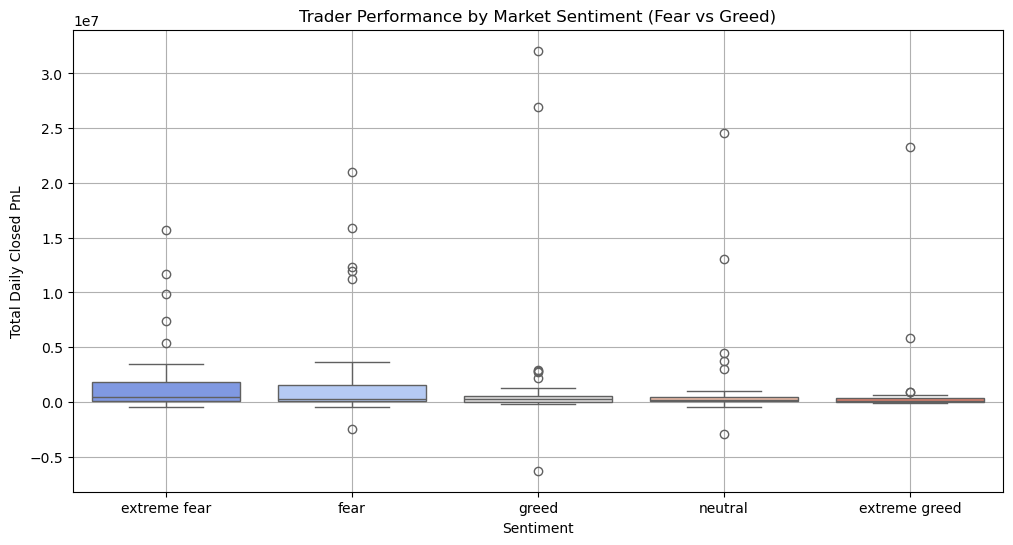

In [94]:
# 📊 Visualize Performance by Sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(data=performance_df, x='sentiment', y='closed_pnl', palette='coolwarm')
plt.title("Trader Performance by Market Sentiment (Fear vs Greed)")
plt.xlabel("Sentiment")
plt.ylabel("Total Daily Closed PnL")
plt.grid(True)
plt.show()




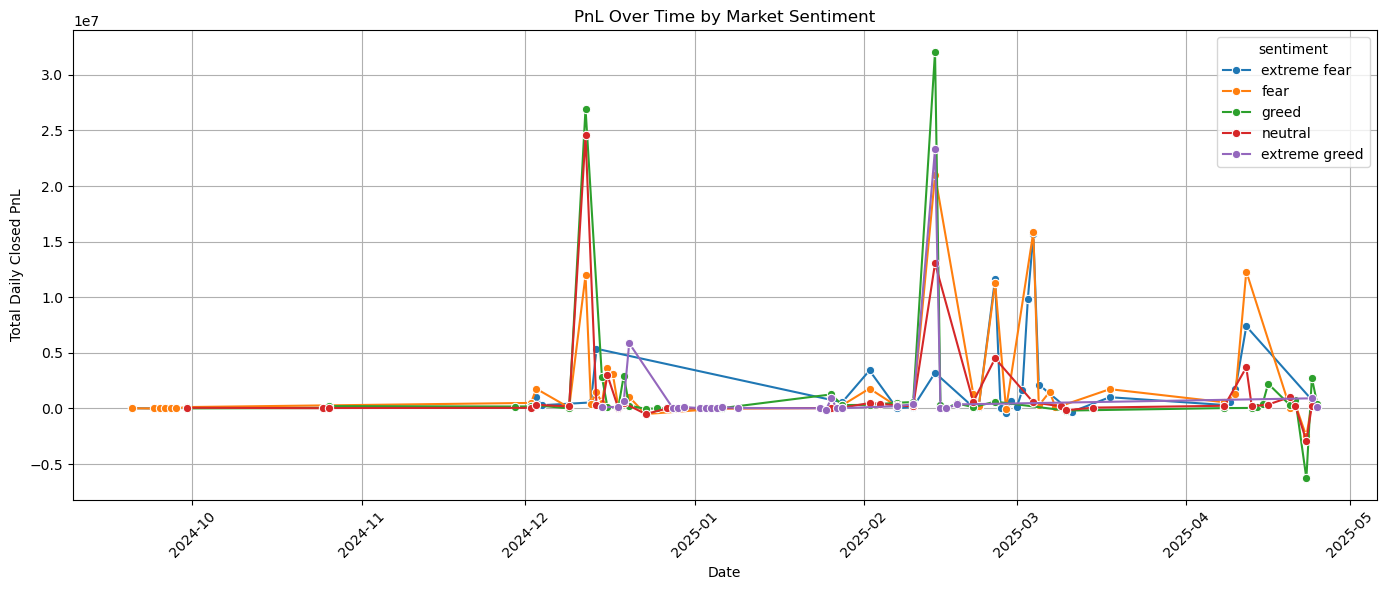

In [95]:
# 📈 Trend of PnL Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(data=performance_df, x='date', y='closed_pnl', hue='sentiment', marker='o')
plt.title("PnL Over Time by Market Sentiment")
plt.xlabel("Date")
plt.ylabel("Total Daily Closed PnL")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [96]:
# 🧠 Additional: Average PnL under Fear vs Greed
avg_pnl = performance_df.groupby('sentiment')['closed_pnl'].mean()
print("📌 Average PnL by Sentiment:")
print(avg_pnl)



📌 Average PnL by Sentiment:
sentiment
extreme fear     2.106403e+06
extreme greed    1.283847e+06
fear             2.116469e+06
greed            1.783167e+06
neutral          1.449098e+06
Name: closed_pnl, dtype: float64


In [97]:
# 🧪 Optional: T-test for significance
from scipy.stats import ttest_ind

fear_pnl = performance_df[performance_df['sentiment'] == 'fear']['closed_pnl']
greed_pnl = performance_df[performance_df['sentiment'] == 'greed']['closed_pnl']

t_stat, p_value = ttest_ind(fear_pnl, greed_pnl, equal_var=False)
print(f"\nT-test Result:\nT-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

if p_value < 0.05:
    print("✅ Statistically significant difference in PnL between Fear and Greed days.")
else:
    print("⚠️ No statistically significant difference detected.")



T-test Result:
T-statistic: 0.263, P-value: 0.793
⚠️ No statistically significant difference detected.
